# Kernel Perceptron

## Imports

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Clean Data

In [30]:
x, label = load_svmlight_file('mnist.scale')
x = x.toarray()
label = label.astype(int)

In [31]:
label_bits = []
for i, j in enumerate(label):
    j = '{:04b}'.format(j)
    label_bits.append(j)

label_1 = []
label_2 = []
label_3 = []
label_4 = []
for i, j in enumerate(label_bits):
    label_1.append(j[0])
    label_2.append(j[1])
    label_3.append(j[2])
    label_4.append(j[3])

label_1 = np.array(label_1).astype(int)
label_2 = np.array(label_2).astype(int)
label_3 = np.array(label_3).astype(int)
label_4 = np.array(label_4).astype(int)

In [32]:
labels_new = np.vstack((label_1,label_2,label_3,label_4))
labels_new = labels_new.T
for i in labels_new:
    ''.join(map(str, i))

## Model

In [33]:
def activation(a, x, z, p, lr):
    result = np.sum(a*(1 + (lr*(np.dot(x, z)))**p))
    return result

In [34]:
class Kernel_Perceptron:
    
    def __init__(self, lr = 0.05, its = 10, p = 3):
        self.lr = lr
        self.its = its
        self.p = p
    
    def model(self, X, y):
        self.alpha = np.zeros(len(X))
        val = 0
        correct = 0
        misclassified = 0
        for i in range(self.its):
            for j in range(len(X)):
                val = activation(self.alpha, X, X[j], self.p, self.lr)
                result = np.sign(val)
                if result == y[j]:
                    correct+=1
                else:
                    self.alpha[j] = self.alpha[j] + self.lr*y[j]
                    misclassified+=1
                    
        return (correct/(correct+misclassified))
    
    def predict(self, X, y):
        self.alpha = np.zeros(len(X))
        val = 0
        correct = 0
        misclassified = 0
        pred = []
        for j in range(len(X)):
            val = activation(self.alpha, X, X[j], self.p, self.lr)
            result = np.sign(val)
            pred.append(result)
            if result == y[j]:
                correct+=1
            else:
                self.alpha[j] = self.alpha[j] + self.lr*y[j]
                misclassified+=1
                    
        return (correct/(correct+misclassified)), np.array(pred)

## ECOC Training and Testing

In [35]:
i = 1
pred_bits = []
actual_bits = []
for j in labels_new.T:
    X_train, X_test, y_train, y_test = train_test_split(x[:10000], j[:10000], test_size=0.3, random_state=42)
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)
    kp = Kernel_Perceptron()
    print("----Training Model on Bit", str(i) + "----")
    accuracy = kp.model(X_train, y_train)
    print("Training Accuracy for Bit", str(i) + ": ", "{:.00%}".format(accuracy))
    accuracy2, test_preds = kp.predict(X_test, y_test)
    print("Testing Accuracy for Bit", str(i) + ": ", "{:.00%}".format(accuracy2), "\n")
    preds = np.where(test_preds < 0, 0, 1)
    y_actual = np.where(y_test < 0, 0, 1)
    pred_bits.append(preds)
    actual_bits.append(y_actual)
    i+=1

----Training Model on Bit 1----
Training Accuracy for Bit 1:  98%


ValueError: operands could not be broadcast together with shapes (7000,) (3000,) 

## Convert Predicted Bits to Ints

In [20]:
concat_labels = np.vstack(pred_bits)
concat_labels = concat_labels.T

In [21]:
bits = []
for i in concat_labels:
    i = i.astype('str')
    i = ''.join(map(str,i))
    bits.append(i)

pred_nums = []
for i in bits:
    x = int(i, 2)
    if (x > 9):
        x = 9
    pred_nums.append(x)

## Conver Actual Bits to Ints

In [22]:
concat_labels_actual = np.vstack(actual_bits)
concat_labels_actual = concat_labels_actual.T

In [23]:
bits_actual = []
for i in concat_labels_actual:
    i = i.astype('str')
    i = ''.join(map(str,i))
    bits_actual.append(i)

actual_nums = []
for i in bits_actual:
    x = int(i, 2)
    if (x > 9):
        x = 9
    actual_nums.append(x)

## Get Accuracy for Ints

In [24]:
correct = 0
for i,j in enumerate(actual_nums):
    if (pred_nums[i] == actual_nums[i]):
        correct+=1

print("Accuracy for predicted integers: ", "{:.00%}".format(correct/len(actual_nums)))

Accuracy for predicted integers:  6%


## Confusion Matrix

In [13]:
con_mat = confusion_matrix(actual_nums, pred_nums)

In [14]:
con_mat_df = pd.DataFrame(con_mat,
                     index = np.unique(actual_nums), 
                     columns = np.unique(actual_nums))

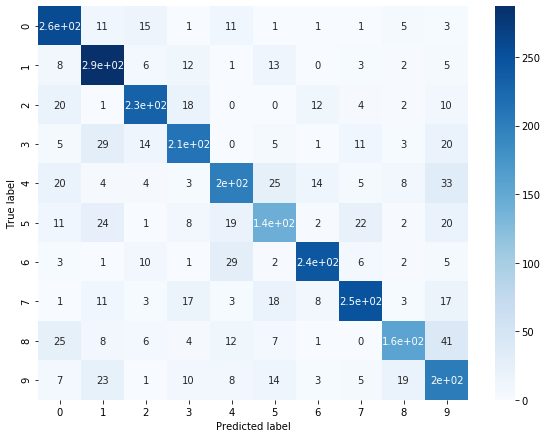

In [15]:
figure = plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()